# Medical Data Visualiser 🩺 📊

Final project for the **Data Analysis with Python** course offerede by [Free Code Camp](https://www.freecodecamp.org/learn/data-analysis-with-python/#data-analysis-with-python-course). 

Check my certificate [here](https://freecodecamp.org/certification/fcc2a39db6b-7401-45ce-9f42-82b2673914c5/data-analysis-with-python-v7).

In this project, I visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset is available at Free Code Camp.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('medical_examination.csv')

In [3]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI. 

In [4]:
df['bmi'] = df['weight']/(df['height']/100)**2
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight

In [5]:
df['overweight'] = df['bmi'].apply(lambda x: 1 if x > 25 else 0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [6]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value.

In [7]:
df_long = pd.melt(df,id_vars = ['cardio'],var_name = 'variable', value_vars = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
df_long.head()

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


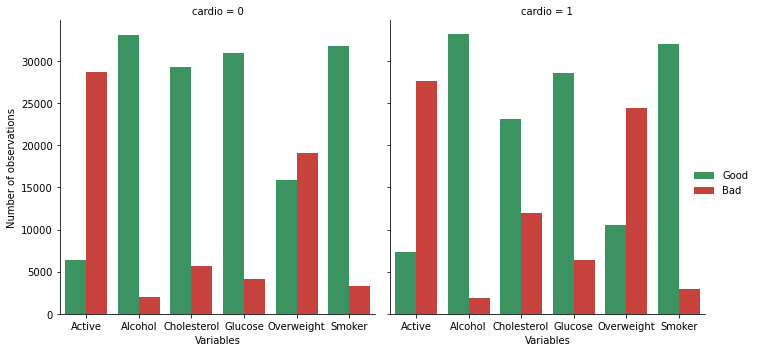

In [8]:
g = sns.catplot(x='variable', data=df_long, hue = 'value', kind='count', col ='cardio',
               palette=sns.color_palette(['#2ca25f', '#de2d26']))
g.set_axis_labels('Variables','Number of observations')
g.set_xticklabels(["Active", "Alcohol",
                   "Cholesterol", "Glucose", "Overweight", "Smoker"])

g._legend.set_title(" ")
new_labels = ['Good', 'Bad']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

Clean the data. Filter out the following patient segments that represent incorrect data:
- diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
- height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
- height is more than the 97.5th percentile
- weight is less than the 2.5th percentile
- weight is more than the 97.5th percentile

In [10]:
df_clean = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) & 
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
     ]
df_clean.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. 

In [11]:
corr = df_clean.corr()
corr.head()

NameError: name 'df_clean' is not defined

<AxesSubplot:>

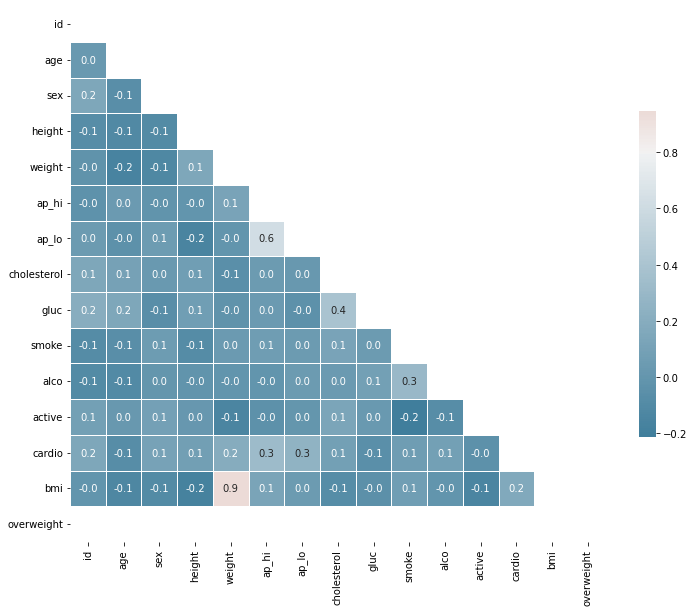

In [146]:
# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))
mask = np.triu(corr)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))


# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
         #   square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, annot = True, fmt = '.1f')
sns.heatmap(corr, mask=mask, center=0.8,cmap = cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, annot = True, fmt = '.1f')


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column
df['overweight'] =  df['bmi'].apply(lambda x: 1 if x > 25 else 0)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df,id_vars = ['cardio'],var_name = 'variable', value_vars = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])




    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = None
    

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(x='variable', data=df_cat, hue = 'value', kind='count', col ='cardio')


    # Get the figure for the output
    

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) & 
    (df['height'] > df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] >= df['weight'].quantile(0.975))
     ]

    # Calculate the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(corr)



    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 12))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, mask=mask, center=0.8,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, annot = True, fmt = '.1f')


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig
